# Section 1) Data wrangling and manipulation 

##### Within this project we will be analysing movie data, gathering insights, and performing data cleansing and data wrangling alongside performing hypothesis testing to draw insights from our movie dataset and provide general recommendations to movie companies based on our findings.

##### All of this will be done with the intention of drawing insights about movies and their current revenue to provide insights to aid movie companies and determine whether or not having a higher budget would or would not impact movie ticket sales from the use of our movie dataset.

In [7]:
#Here I import the data set and read in the file using Pandas from an Excel spreadsheet
import pandas as pd
df=pd.read_csv("movie_metadata.csv")

### Checking the last and first 5 values for nan values

#### This sections aims to remove unimportant values from the data that has been provided to the organisation in order to see the extent to which a higher potential budget will lead to higher revenue for our organisation.

In [8]:
df.head(5) #Taking the first 5 values of our data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [9]:
df.tail(5) #Observing the last 5 values of our data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


### Removing nan values 

In [10]:
df.info() #gaining information about the total amount of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [11]:
columns = ['gross', 'budget', 'aspect_ratio', 'content_rating', 'language', 'actor_2_name', 'actor_3_name', 'num_critic_for_reviews', 'plot_keywords']
#Taking all columns and itereating through use of a for loop, then dropping all values in each column where a nan value is present to clean the data. 
for column in columns:
    nan_indexes = df[df[column].isnull()].index
    df.drop(nan_indexes, inplace=True)
    df.reset_index(drop=True, inplace=True)
#using lab 2
    


In [12]:
df.to_csv("clean_movie_metadata.csv",index=False,index_label=False)
#Saving it to a new file
#using lab 2

#### Within the remove nan-values section I am removing all values in our data that contain nan values, so that we only have values that are of significance within our data. 

In [13]:
pd.unique(df[df.duplicated("movie_title")].movie_title)
#Checking for duplicates 

array(['The Legend of Tarzan\xa0',
       'The Twilight Saga: Breaking Dawn - Part 2\xa0', 'Pan\xa0',
       'Fantastic Four\xa0', 'The Fast and the Furious\xa0',
       'Hercules\xa0', 'Total Recall\xa0', 'The Avengers\xa0',
       'Dredd\xa0', 'Unbroken\xa0', 'Victor Frankenstein\xa0',
       'From Hell\xa0', 'Ghostbusters\xa0', 'The Jungle Book\xa0',
       'Snakes on a Plane\xa0', 'Point Break\xa0', 'King Kong\xa0',
       'Eddie the Eagle\xa0', 'Chasing Liberty\xa0', 'The Island\xa0',
       'Disturbia\xa0', 'Wicker Park\xa0', 'Conan the Barbarian\xa0',
       'Twilight\xa0', 'Death at a Funeral\xa0', 'Glory\xa0', 'Hero\xa0',
       'TRON: Legacy\xa0', 'The Illusionist\xa0', 'Left Behind\xa0',
       'Halloween\xa0', 'Aloha\xa0', 'Clash of the Titans\xa0',
       'The Possession\xa0', 'Dangerous Liaisons\xa0', 'Big Fat Liar\xa0',
       'Teenage Mutant Ninja Turtles\xa0', 'RoboCop\xa0', 'Brothers\xa0',
       'Casino Royale\xa0', 'The Alamo\xa0', 'The Host\xa0', 'Home\xa0',
      

In [14]:
df.drop_duplicates('movie_title', inplace=True)

#### This section cleanses the data further by removing any missing values or duplicates from the data the company has provided. 

### Part 2) Exploratory Data Analysis

In [15]:
#Taking the means, median and mode of sections most relevant to our analysis. 
#using lab 2 

#means:
print(f"The average duration of mins for each film shown = {df['duration'].mean():.2f}")
print(f"The average total revenue for each film shown = {df['gross'].mean():.2f}")
print(f"The average for imbd scores is = {df['imdb_score'].mean():.2f}")
print(f"The average budget for each film is = {df['budget'].mean():.2f}")
print(f"The average num critics for reviews is = {df['num_critic_for_reviews'].mean():.0f}")
print(f"The average total likes from facebook is = {df['movie_facebook_likes'].mean():.0f}")
print(f"The average of voted users is = {df['num_voted_users'].mean():.0f}")

#median
print(f"The median duration of mins for each film shown = {df['duration'].median():.2f}")
print(f"The median total revenue from all displayed films = {df['gross'].median():.2f}")
print(f"The median duration of mins for each film shown = {df['imdb_score'].median():.2f}")
print(f"The median budget for each film is = {df['budget'].median():.2f}")
print(f"The median num critics for reviews is = {df['num_critic_for_reviews'].median():.0f}")
print(f"The median total likes from facebook is = {df['movie_facebook_likes'].median():.0f}")
print(f"The median of voted users is = {df['num_voted_users'].median():.0f}")

#modes:
print(f"The most frequently occuring budget = {df['budget'].mode().iloc[0]:.2f}")

The average duration of mins for each film shown = 110.18
The average total revenue for each film shown = 51849690.33
The average for imbd scores is = 6.46
The average budget for each film is = 42443534.60
The average num critics for reviews is = 165
The average total likes from facebook is = 9169
The average of voted users is = 104718
The median duration of mins for each film shown = 106.00
The median total revenue from all displayed films = 29274751.00
The median duration of mins for each film shown = 6.60
The median budget for each film is = 25000000.00
The median num critics for reviews is = 136
The median total likes from facebook is = 209
The median of voted users is = 52965
The most frequently occuring budget = 20000000.00


#### The code is providing the median, mean and mode of the factors that are most relevant to our potential stakeholders. 

##### Some figures that we may want to pay an increasingly high level of importance to would be the mean for the budget, as that would the average budget for each film, as we are hoping to achieve £1.5 million in funding, but we could highlight to our potential investors that this amount is still significantly below the average budget each film has which is £39 million, and therefore potentially push for even greater levels of funding. 

##### In addition to this, the total revenue that each film would make on average would be £48 million. Therefore, this would most likely yield a great return on investment for our potential stakeholders, due to such factors. 

##### However, it seems that the budget which is most frequently occuring is £20 million, as that is deemed most appropriate, which strengthens what I was previously mentioning. 

Text(0.5, 1.0, 'Financial Link: Comparing Log(Gross) vs Log(Budget) to Understand the Importance of a Strong Budget')

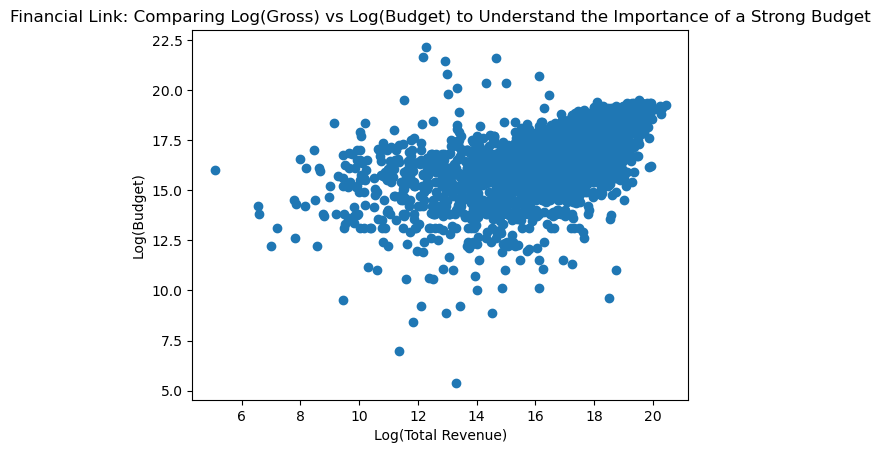

In [16]:
#Creating a scatter plot using numpy and matplotlib to see the correlation between budget and gross, but I took the log of both.
# This was due to the values being to great, therefore to preserve the correlation whilst still displaying our findings. 
#using lab 3 

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1)

# Log transformation 
ax.scatter(np.log(df['gross']), np.log(df['budget']))

ax.set_xlabel("Log(Total Revenue)")
ax.set_ylabel("Log(Budget)")
ax.set_title("Financial Link: Comparing Log(Gross) vs Log(Budget) to Understand the Importance of a Strong Budget")


#### This graph demonstrated that there is a positive correlation between the total revenue and organisation will recieve and the total level of funding they acquire. Consequently, if we are pushing for funding of £1.5 million, we could mention that it is likely that the higher the funding is that we recieve the more likely it is that we will get higher total revenues from such funding, due to past trends in the film market. 

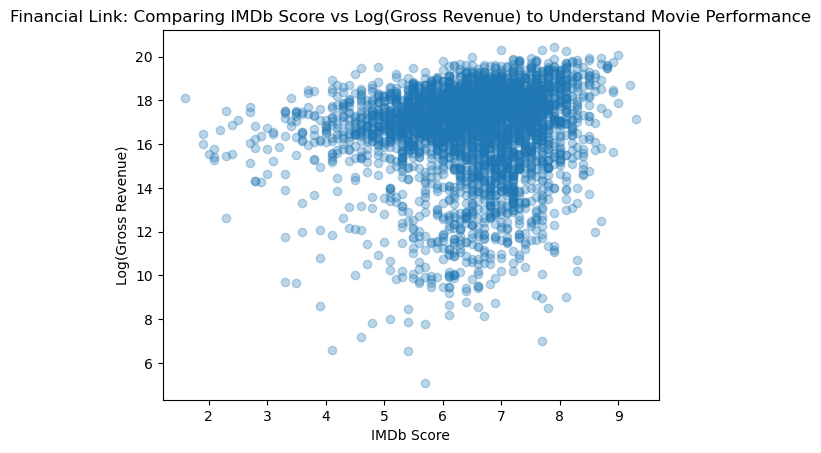

In [17]:
#This correlation was quite difficult to see through a simple scatter plot, so I performed the same methods
#as above but I increased the transparency of each point to more easily see the correlation between log gross, and imdb scores.
#using lab 3 

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(df['imdb_score'], np.log(df['gross']), alpha=0.3)

ax.set_xlabel("IMDb Score")
ax.set_ylabel("Log(Gross Revenue)")
ax.set_title("Financial Link: Comparing IMDb Score vs Log(Gross Revenue) to Understand Movie Performance")

plt.show()


#### In the above graph we can see that there is a positive correlation between imdb scores of films and the gross revenue that they recieve. This would suggest that those films which likely have a higher budget, also have higher total revenues and overall higher imdb scores. Therefore, this stresses the importance of having a large budget for film production to our potential investors, as emphasises the importance of having a higher budget, as a higher budget for film production is associated with higher total revenues, and that is associated with higher imdb scores. 

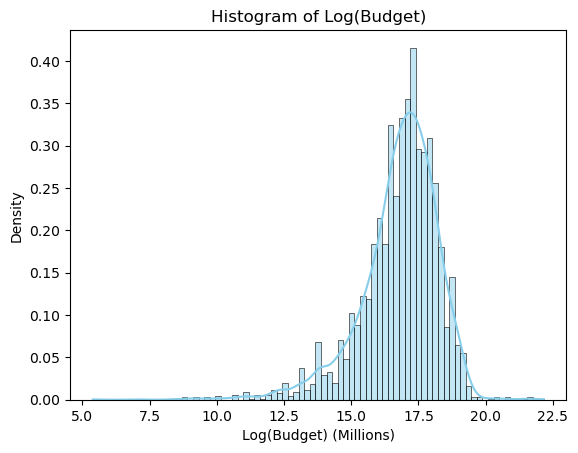

In [18]:
#Here I am creating a Histogram of log budget. I use log because to accomodate for the massive values of budget.
# The second graph has budget on the x axis with density on the y axis using 
#Matplotlib for the plot.
#using lab 3

#The values here were turned into log-transformed values, as once again the values were far too large to show the distribtuion of the data.

df['log_gross'] = np.log1p(df['gross'])
df['log_budget'] = np.log1p(df['budget'])


sns.histplot(data=df, x='log_budget', kde=True, stat='density', color='skyblue')
plt.title('Histogram of Log(Budget)')
plt.xlabel('Log(Budget) (Millions)' )
plt.ylabel('Density')
plt.show()


#### Here I have a Histograms with respect to log budget in order to understand the distribution of the data that I am working with. Additionally, we can see that  log budget has outliers at 8 million, futher away from the centre of the distribtion, which is 17 million for budget, on this diagram. 

#### In addition, it seems that we have a distribution that is negative left skew distribution towards the left. This would mean that the frequency of such values peaks around the 17 million mark and begins to fall lower as we move further to the left of the Histogram, and although these values aren't fully represenative of the findings we made when observing the average values, these findings seem to be still in allignment with our previous findings, due to shape of the distribution. 

#### Below I have created a Histogram for the total revenue recieved.

#### Above we can observe that the distribution of the gross revenue is positively skewed right, as the values tend to peak on the left and the frequency of higher budgets fall as we move higher. Such findings seem to be in allignment with what we have found as the mean budget was around £51 million, and the mode budget was £20 million, which is shown on the left hand side of this histogram, as the values peaks between 0-50.

#### Outliers can also be observed as, we do have values around £300 million and £250 million, so those too will need to be taken into consideration as they too will impact the overall quality of our data. 

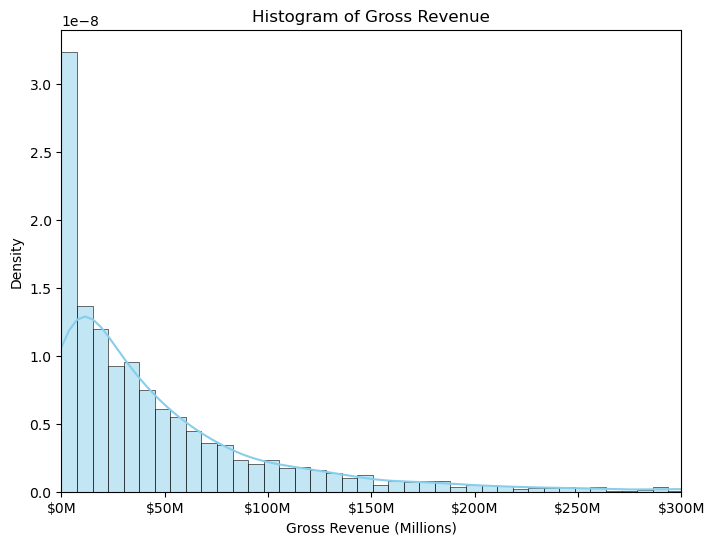

In [19]:
#Using matploblib I created a Histogram of Gross Revenue and use matplotlib.ticker in order to change the limit that was set 
# on budget in order to more accurately display the gross revenue on the x-axis and density on the y-axis. 

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=df, x='gross', kde=True, stat='density', color='skyblue', ax=ax)
ax.set_title('Histogram of Gross Revenue')
ax.set_xlabel('Gross Revenue (Millions)')
ax.set_ylabel('Density')

#
ax.set_xlim(0, 300e6)


formatter = ticker.FuncFormatter(lambda x, pos: f'${x/1e6:.0f}M')
ax.xaxis.set_major_formatter(formatter)

plt.show()


### Part 3) Hypothesis Testing

\begin{align*}
\mathbf{H}_0 \quad &: \quad \mu = 42,443,534.60 \\
\mathbf{H}_1 \quad &: \quad \mu \gt 42,443,534.60 
\end{align*}

#### Here I am testing my hypothesis with a one sided test to see whether or not a higher budget will lead to a higher gross overall.

In [92]:
#using lab 4 
country_counts = df[df['country'] == 'UK']['country'].value_counts()

for country, count in country_counts.items():
    print(f"The sample size of movies for {country} is {count}")

#the mean 

uk_budget_mean = df[df['country'] == 'UK']['budget'].mean()
print(f"The m of 'budget' for the UK is {uk_budget_mean}")


The sample size of movies for UK is 306
The mu of 'budget' for the UK is 29979244.22875817


In [98]:
#using lab 4 
uk_mean = 29979244.22875817
uk_sample_size = 306


data_points_uk = df[df['country'] == 'UK']['budget'].tolist()


uk_std_dev = np.std(data_points_uk, ddof=1)  # ddof=1 for sample standard deviation

print(f"The standard deviation of 'UK' is: {uk_std_dev}")


The standard deviation of 'UK' is: 39248962.12361865


In [99]:
#using lab 4 
from scipy.stats import norm


uk_mean_budget = 29979244.22875817
uk_sample_size_budget = 306
uk_std_dev_budget = uk_budget_std  # Assuming you calculated this before


uk_budget_data = df[df['country'] == 'UK']['budget']

alpha = 0.01

z_score_budget = (uk_budget_mean - uk_mean_budget) / uk_std_error_budget
p_value_budget = norm.cdf(z_score_budget)

print("Budget")
print(f"There is a {100. * p_value_budget:.2f}% chance of the observed mean being greater than {uk_budget_mean:.0f} given the underlying mean is {uk_mean_budget:.0f}")
print(f"Reject the null hypothesis at the {100. * alpha:.1f}% significance level" if p_value_budget < alpha else f"There isn't sufficient evidence to reject the null hypothesis at the {100. * alpha:.1f}% significance level")


Budget
There is a 50.00% chance of the observed mean being greater than 29979244 given the underlying mean is 29979244
There isn't sufficient evidence to reject the null hypothesis at the 1.0% significance level


#### This would suggest that we don';t have sufficient evidence to suggest that a higher budget would lead to higher overall movie ticket sales. This could potentially be because there are other factors at work which may have a greater influence on total revenue, than budget, such as the actors that we hire, or the director that is used in the films production. Therefore, we should still display that factor to our investors in hopes of securing the appropriate level of funding for our project.

## Conclusion)

#### Overall, it is unclear whether a higher budget would or would not lead to higher gross, and it seems currently that the outcome is unclear. Therefore, further research would have to be conducted as to what other factors contribute to higher gross to convince our potential investors about our newest business venture.